In [1]:
import os
import glob
import random
import skimage

import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib, utils
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
    return ax

In [6]:
config = mr.TrainConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        30
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [7]:
work_path = os.path.join("E:", os.sep, "RCNNTanks256Train")
os.chdir(work_path)

In [8]:
dataset = mr.MRDataset()
dataset.load(work_path)
dataset.prepare()

In [9]:
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 9030
Class Count: 2
  0. BG                                                
  1. C_TankCompleted                                   


Below is a quick hack (avg of avg, is not right :-)

In [ ]:
avg0 = []
avg1 = []
avg2 = []

tif_glob = glob.glob(os.path.join(work_path, "*", "images", "*.tif"))
for tif_file in tif_glob:
    tif_image = skimage.io.imread(tif_file)
    avg0.append(np.average(tif_image[:,:,0]))
    avg1.append(np.average(tif_image[:,:,1]))
    avg2.append(np.average(tif_image[:,:,2]))
        
print("MEAN_PIXEL = np.array([{:.1f}, {:.1f}, {:.1f}])".format(np.average(avg0), np.average(avg1), np.average(avg2)))

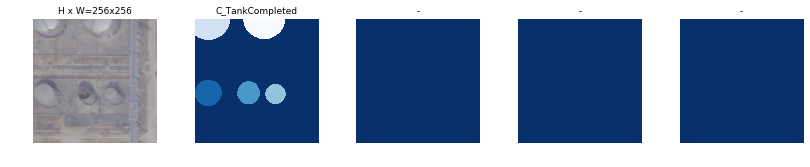

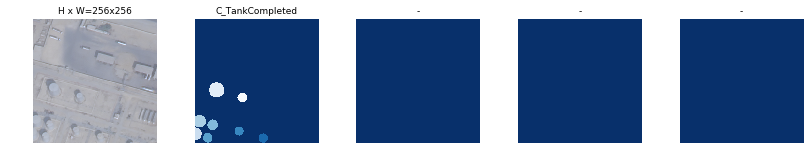

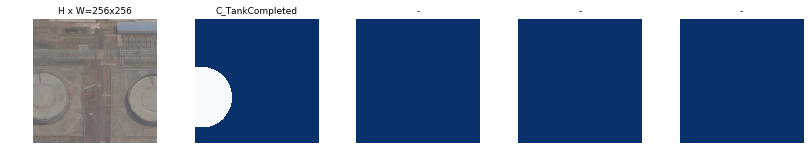

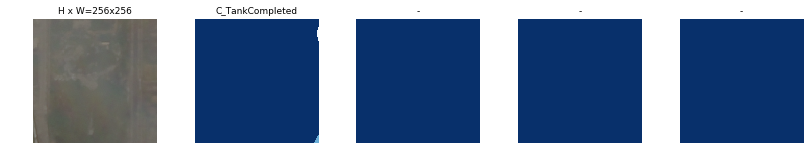

In [18]:
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

7963 E:\RCNNTanks256Train\Paradip20170717_052404\images\000000117.tif
[1]
[[ 0 14 32 93]]


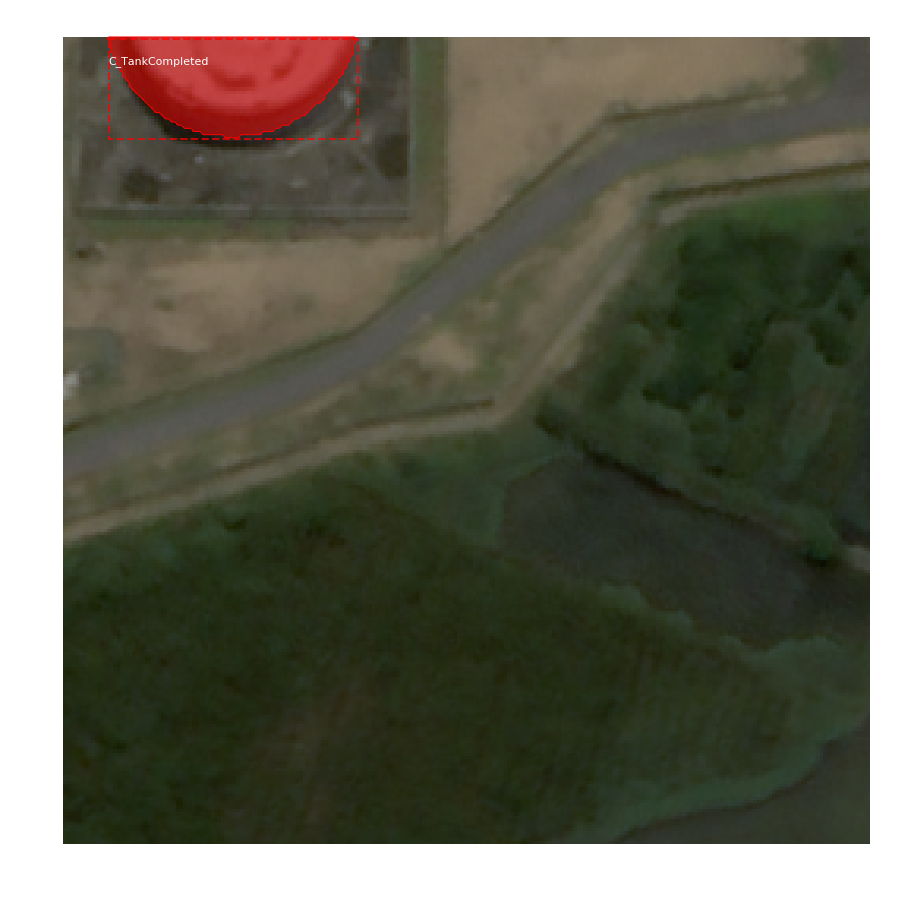

In [50]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)
# Display image and additional stats
print(image_id, dataset.image_reference(image_id))
print(class_ids)
print(bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)